In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay


### **1. Generating a Synthetic Dataset**


In [2]:
# Generate a synthetic dataset
X, y = make_classification(n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)


### **2. Splitting the Dataset into Training and Testing Sets**

In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### **3. Scaling the Features**

In [4]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit to training data and transform
X_test_scaled = scaler.transform(X_test)        # Transform test data


### **4. Training the k-NN Model and Evaluating Accuracy for Different k Values**

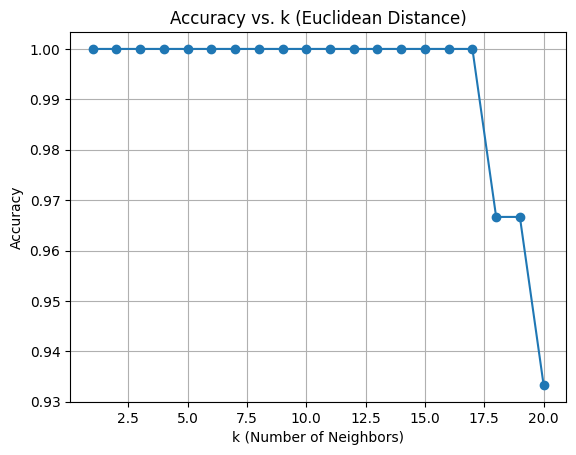

In [5]:
# Train the k-NN model and evaluate accuracy for different values of k
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')  # Initialize k-NN with Euclidean distance
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot accuracy for different k values
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. k (Euclidean Distance)")
plt.grid(True)
plt.show()


### **5. Evaluating k-NN with Different Distance Metrics**

In [6]:
# Evaluate k-NN with different distance metrics
metrics = ['euclidean', 'manhattan', 'minkowski']

for metric in metrics:
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)

    print(f"Accuracy with {metric} distance: {acc:.2f}")


Accuracy with euclidean distance: 1.00
Accuracy with manhattan distance: 1.00
Accuracy with minkowski distance: 1.00


### **6. Performing Cross-Validation to Estimate Model Performance**

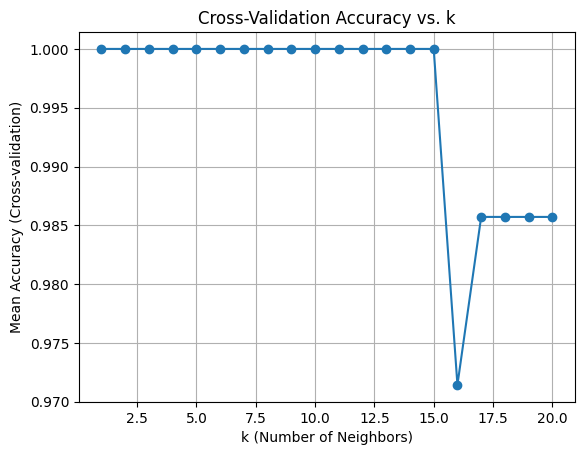

In [7]:
# Perform Cross-Validation to get a better estimate of model performance
mean_accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)  # 5-fold cross-validation
    mean_accuracies.append(scores.mean())

# Plot cross-validation accuracy vs. k
plt.plot(k_values, mean_accuracies, marker='o')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Mean Accuracy (Cross-validation)")
plt.title("Cross-Validation Accuracy vs. k")
plt.grid(True)
plt.show()


### **7. Visualizing Decision Boundaries for Different k Values**

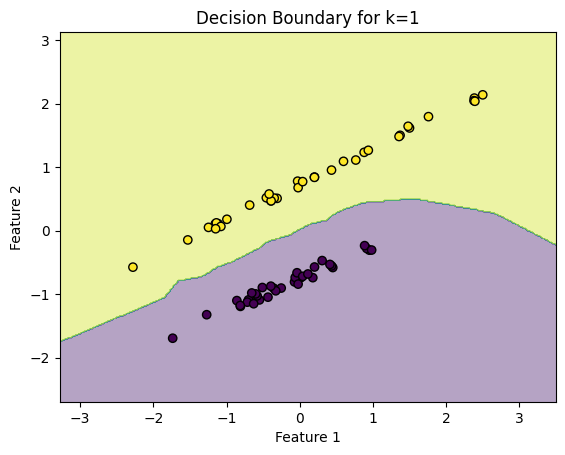

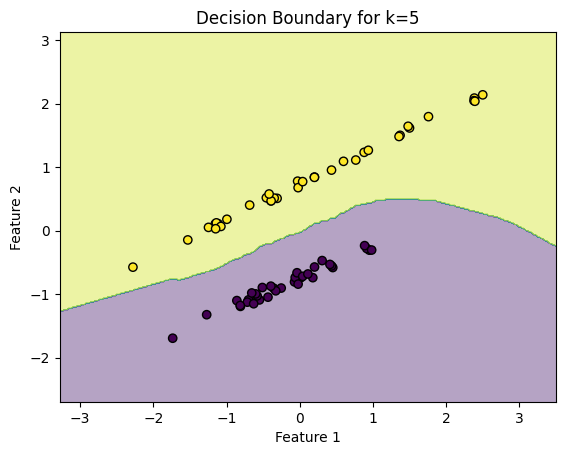

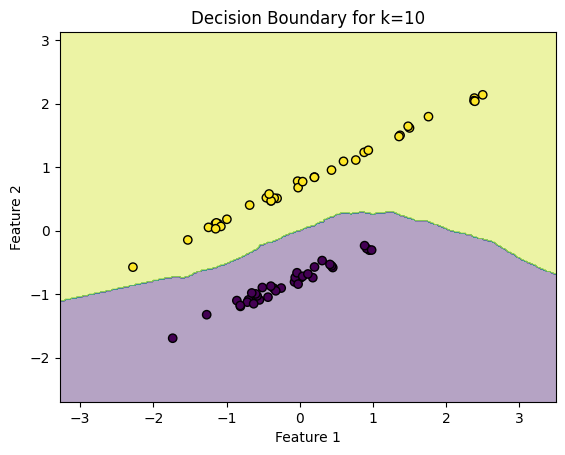

In [8]:
# Visualize decision boundaries for different k values
# Step size in the mesh
h = .02
# Create mesh grid over the feature space
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Visualize decision boundary for different k values
for k in [1, 5, 10]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    # Plot the decision boundary
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

# Plot decision boundary and training data
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
    plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, edgecolor='k', cmap='viridis')
    plt.title(f"Decision Boundary for k={k}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


### **8. Training k-NN Model and Evaluating Performance for k=5**

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



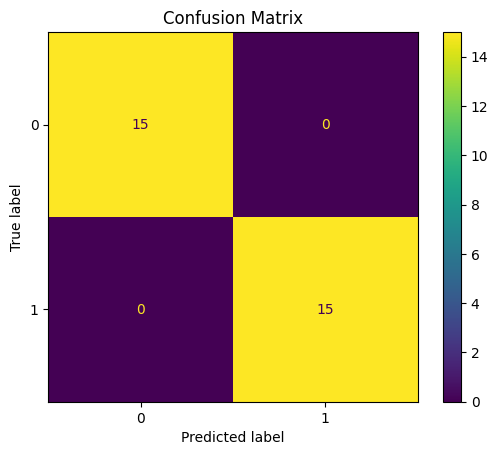

In [9]:
# Train the k-NN model and evaluate performance (for the selected k=5)
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(knn, X_test_scaled, y_test, cmap="viridis")
plt.title("Confusion Matrix")
plt.show()
